In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y= pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [88]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["LGBTQ", "Technology", "Supply Chain", "Converse", "Competition", "Currency Fluctuations", "Tariffs",
           "Karina", "Demand"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [89]:
df = df.resample("Q").mean()

In [90]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [11]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

In [92]:
X_scaled = scaler.fit_transform(X)

C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [93]:
print(X_scaled.shape)
print(y.shape)

(79, 9)
(79, 1)


In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Assuming df is the dataframe with the Google Trends data
X_scaled = scaler.fit_transform(X)

# Print shapes to confirm correct dimensions
print(X_scaled.shape)
print(y.shape)


(79, 9)
(79, 1)


C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [17]:
from sklearn.linear_model import Lasso

C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


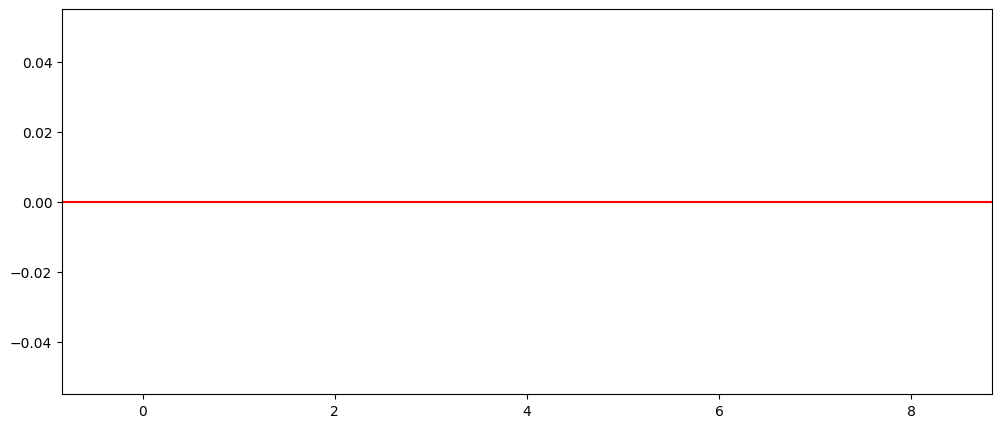

In [99]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_scaled, y)
coefficients = lasso.coef_
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color = "red")
plt.show()

In [95]:
lasso = Lasso(alpha=0.01)

At this case, I set alpha=0.01 becasue for the given 0.5 option, the model is oenalized heavily for having the non-zero coefficients for independent variables. The barchat wont't show any meaningful histgrame for the coeffcitns. However, setting alpha=0.01 relieved this problem and assisting us output a more reasonable bar chart. Thus, I will use alpha=0.01 for the following discussion. 

In [96]:
lasso.fit(X_scaled, y)

C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\13976\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Lasso(alpha=0.01)

In [97]:
coefficients = lasso.coef_

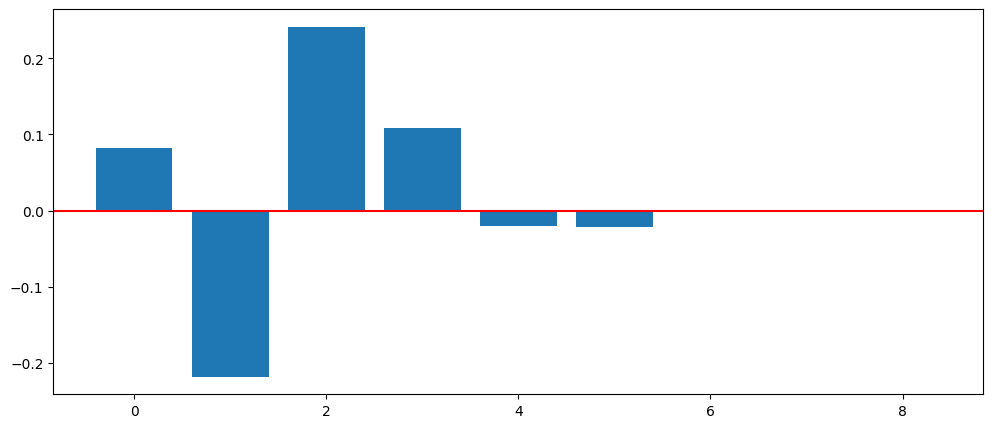

In [98]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The bar chart illustrates the correlations among various independent variables within the regression model and their relationship with the dependent variable, "BasicEPS." The independent variables under consideration include "LGBTQ," "Technology," "Supply Chain," "Converse," "Competition," "Currency Fluctuations," "Tariffs," "Karina," and "Demand."

Analysis of the chart reveals that the initial six variables—namely "LGBTQ," "Technology," "Supply Chain," "Converse," "Competition," and "Currency Fluctuations"—exhibit a discernible correlation with "BasicEPS." Among these, "Technology," "Competition," and "Currency Fluctuation" demonstrate a negative association. The variable "Technology" potentially reflects the impact of technological advancements on "BasicEPS," while "Competition" might signify the competitive dynamics between the focal product and its substitutes. Moreover, "Currency Fluctuations" are observed to negatively influence "BasicEPS." Conversely, "LGBTQ," "Supply Chain," and "Converse" exhibit a positive correlation, suggesting an augmentation in the value of "BasicEPS."

Interestingly, "Karina," representing an unrelated personal name, displays no significant correlation with Apple's stock price, aligning with initial expectations. Similarly, "Tariffs" and "Demand" also show negligible correlation with "BasicEPS," as anticipated.